Synthetic Vulnerability Dataset Features

| **Feature Name**              | **Description**                                                  | **Example Values**             |
| ----------------------------- | ---------------------------------------------------------------- | ------------------------------ |
| **cve\_id**                   | Unique identifier for the vulnerability (CVE format)             | `CVE-2025-0001`                |
| **attack\_vector (AV)**       | How the vulnerability can be exploited                           | `NETWORK`, `ADJACENT`, `LOCAL` |
| **attack\_complexity (AC)**   | Complexity of the attack to exploit the vulnerability            | `LOW`, `HIGH`                  |
| **privileges\_required (PR)** | Level of privileges required for successful exploit              | `NONE`, `LOW`, `HIGH`          |
| **user\_interaction (UI)**    | Whether user interaction is required                             | `NONE`, `REQUIRED`             |
| **base\_score**               | CVSS Base Score (numeric, 0.0 to 10.0)                           | `7.5`, `4.3`                   |
| **days\_since\_disclosure**   | Number of days since vulnerability was publicly disclosed        | `1`, `180`                     |
| **exploit\_available**        | Target label for ML (whether exploit code is publicly available) | `0` (No), `1` (Yes)            |


Dataset Characteristics
- Rows: 5,000 (synthetic samples)

- Columns: 8

- Target Variable: exploit_available (binary classification)

Usage
- Used to simulate real-world CVE data from sources like Rapid7.

- Enables:

    - CVSS-based scoring calculations

    - Predictive ML modeling for exploit availability

    - Demonstrating SageMaker pipelines with synthetic security data

Sample synthetic dataset:
          cve_id attack_vector attack_complexity privileges_required  \
0  CVE-2025-0000       NETWORK              HIGH                NONE   
1  CVE-2025-0001         LOCAL               LOW                HIGH   
2  CVE-2025-0002         LOCAL               LOW                HIGH   
3  CVE-2025-0003      ADJACENT              HIGH                NONE   
4  CVE-2025-0004       NETWORK              HIGH                NONE   

  user_interaction  base_score  days_since_disclosure  exploit_available  
0             NONE         6.4                     72                  0  
1         REQUIRED         6.8                     17                  1  
2             NONE         2.2                    333                  0  
3             NONE         4.2                    358                  1  
4             NONE         2.8                    195                  1  

Encoded feature set shape: (5000, 8)

Training sample: 4000, Test samples: 1000

Model Per

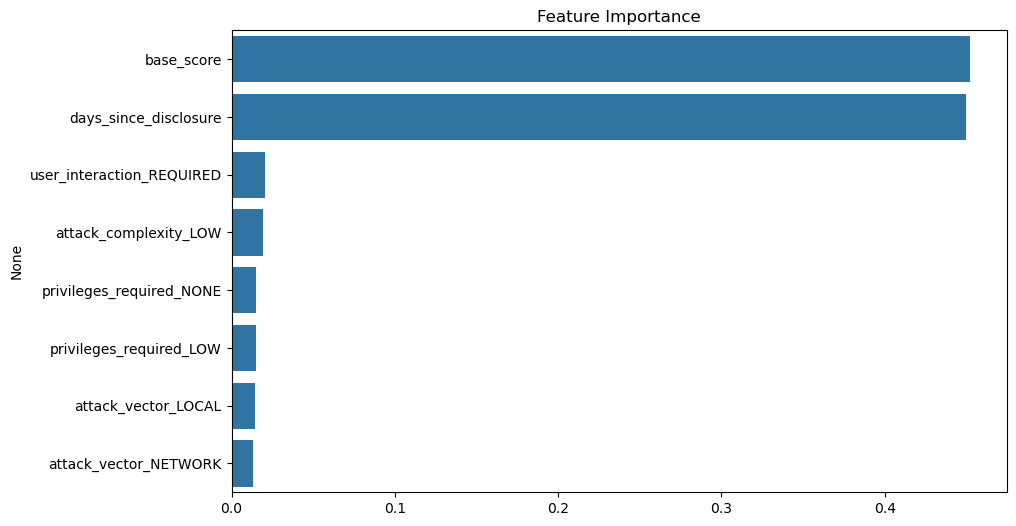


Sample Prediction:
      base_score  days_since_disclosure  attack_vector_LOCAL  \
1501         8.5                    179                False   

      attack_vector_NETWORK  attack_complexity_LOW  privileges_required_LOW  \
1501                   True                  False                     True   

      privileges_required_NONE  user_interaction_REQUIRED  
1501                     False                      False  
Predicted exploit_available: 1


In [4]:
# ============================================
# 1. Imports
# ============================================
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
random.seed(42)
np.random.seed(42)

# ============================================
# 2. Synthetic Data Generator
# ============================================
def generate_synthetic_data(n=5000):
    """
    Generate a synthetic dataset resembling CVE vulnerability data with CVSS metrics.
    """
    av = ['NETWORK', 'ADJACENT', 'LOCAL']
    ac = ['LOW', 'HIGH']
    pr = ['NONE', 'LOW', 'HIGH']
    ui = ['NONE', 'REQUIRED']

    data = []
    for i in range(n):
        base_score = round(random.uniform(0, 10), 1)

        # Generate a binary label with some correlation to base_score
        exploit_prob = 0.3 + (base_score / 20) # Higher base score => higher exploit probability
        exploit_prob = min(exploit_prob, 0.95)
        
        row = {
            'cve_id': f'CVE-2025-{i:04d}',
            'attack_vector': random.choice(av),
            'attack_complexity': random.choice(ac),
            'privileges_required': random.choice(pr),
            'user_interaction': random.choice(ui),
            'base_score': base_score,
            'days_since_disclosure': random.randint(1, 365),
            'exploit_available': 1 if random.random() < exploit_prob else 0
        }
        data.append(row)
    return pd.DataFrame(data)

# Generate dataset
df = generate_synthetic_data()
print("Sample synthetic dataset:")
print(df.head())

# ============================================
# 3. Encode Categorical Features
# ============================================
df_encoded = pd.get_dummies(df.drop(columns=['cve_id']), drop_first=True)

# Features (X) and Target (y)
X = df_encoded.drop(columns=['exploit_available'])
y = df_encoded['exploit_available']

print("\nEncoded feature set shape:", X.shape)

# ============================================
# 4. Train-Test Split
# ============================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining sample: {len(X_train)}, Test samples: {len(X_test)}")

# ============================================
# 5. Train Random Forest Model
# ============================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ============================================
# 6. Evaluate Model
# ============================================
y_pred = model.predict(X_test)
print("\nModel Performance:\n")
print(classification_report(y_test, y_pred))

# Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importance')
plt.show()

# ============================================
# 7. Example Prediction
# ============================================
sample = X_test.iloc[[0]]
predicted = model.predict(sample)[0]
print("\nSample Prediction:")
print(sample)
print(f"Predicted exploit_available: {predicted}")

✅ What This Notebook Does

✔ Generates synthetic vulnerability dataset
(similar to Rapid7-style data for CVSS-based analysis)

✔ Includes CVSS-like features
(e.g., attack_vector, attack_complexity, privileges_required, user_interaction, base_score, etc.)

✔ One-hot encodes categorical features
(for compatibility with ML algorithms)

✔ Trains a RandomForestClassifier
(predicts exploit_available as a binary target)

✔ Outputs a classification report and feature importance visualization
(evaluates model performance and interprets feature impact)

✔ Shows an example prediction
(demonstrates inference for a single sample vulnerability)